## Contents

## 1. Importing libraries and data and renaming columns
## 2. The elbow technique
## 3. k-means clustering

## 1. Importing libraries and data and renaming columns

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [98]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [99]:
# Set Path
path = r'C:\Users\Ryan Pares\Zomato'

In [109]:
# Import real_estate.csv dataset
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','zomato.csv'))

In [110]:
# Check shape
df.shape

(43740, 12)

In [111]:
# Drop all the columns with categorical variables
df = df.drop(columns=['address', 'name', 'location', 'rest_type', 'cuisines', 'reviews_list', 'listed_in(type)',
       'listed_in(city)', 'Price category'])

In [112]:
df.head()

,rate,votes,approx_cost(for two people)
0,4,775,800
1,4,787,800
2,4,918,800
3,4,88,300
4,4,166,600


In [113]:
df.columns

Index(['rate', 'votes', 'approx_cost(for two people)'], dtype='object')

## 2. The elbow technique

In [114]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [115]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-35205075225.24623,
 -15309910163.504642,
 -9023561467.966862,
 -6335455961.5073595,
 -5031420273.909321,
 -3925229958.0121017,
 -2928186954.8759484,
 -2504220557.98044,
 -2158497299.400353]

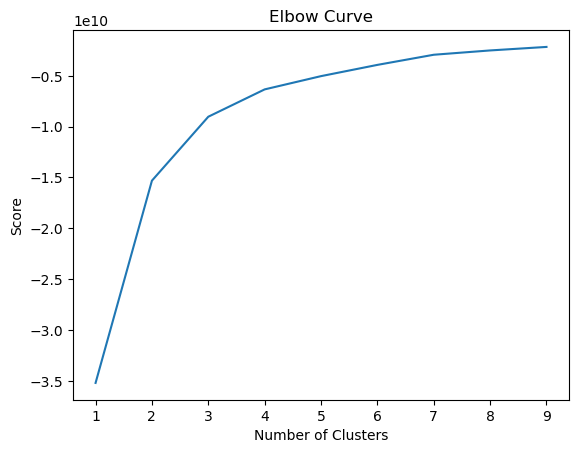

In [116]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### We use 3 as the number of clusters in the given elbow curve because it represents the point where adding more clusters does not significantly improve the model. This is known as the “elbow point.”

#### The plot decreases sharply up to 3 clusters, beyond this point, the rate of improvement slows down, forming an “elbow” shape. This suggests that 3 clusters are optimal, balancing model accuracy and complexity.

## 3. k-means clustering

In [117]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [118]:
# Fit the k-means object to the data.
kmeans.fit(df)

KMeans(n_clusters=3)

In [119]:
df['clusters'] = kmeans.fit_predict(df)

In [120]:
df.head()

,rate,votes,approx_cost(for two people),clusters
0,4,775,800,0
1,4,787,800,0
2,4,918,800,0
3,4,88,300,0
4,4,166,600,0


In [121]:
df['clusters'].value_counts()

0    41054
1     2483
2      203
Name: clusters, dtype: int64

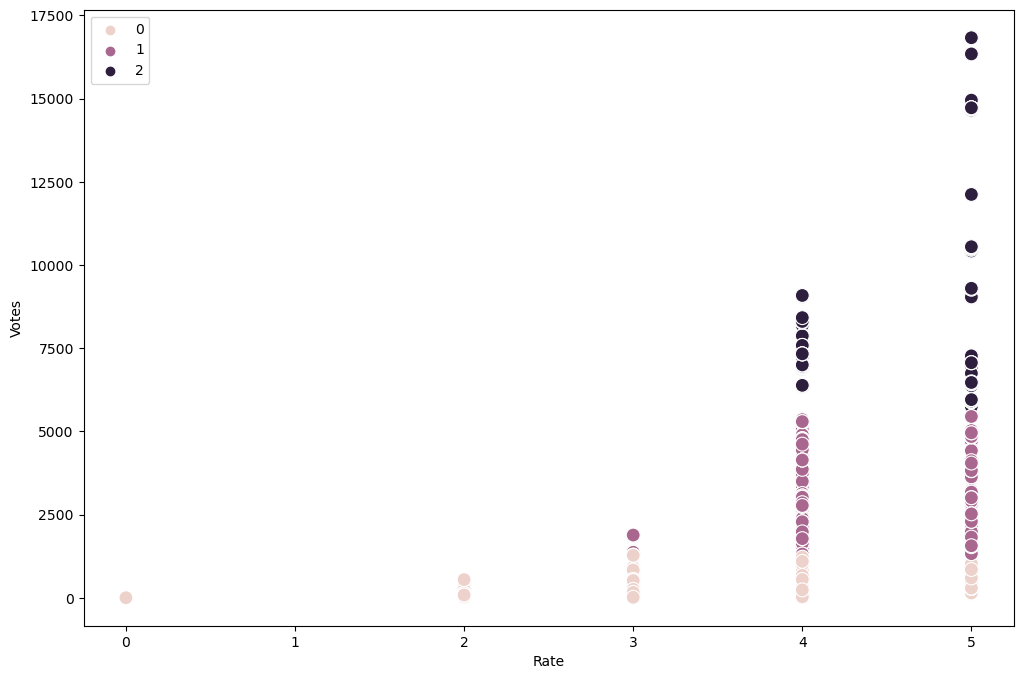

In [127]:
# Plot the clusters for the "Rate" and "Votes" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['rate'], y=df['votes'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Rate') # Label x-axis.
plt.ylabel('Votes') # Label y-axis.
plt.show()

#### Rate vs. Votes:
#### Q: What is the distribution of votes across different rates?
#### A: The votes are more concentrated towards the lower end of the ‘Votes’ axis, with a spread across the ‘Rate’ axis from 0 to 5.
#### Q: Are there any rates where the number of votes is significantly higher or lower than others?
#### A: Yes, there are certain rates where the number of votes is significantly higher, particularly around the lower end of the ‘Votes’ axis.
#### Q: How does the number of votes vary with different rates?
#### A: The number of votes varies across different rates, with a noticeable concentration of votes at certain rates, indicating a potential trend or pattern.

#### The points are clustered in vertical lines at specific rates, indicating that each rate has a variety of votes associated with it.

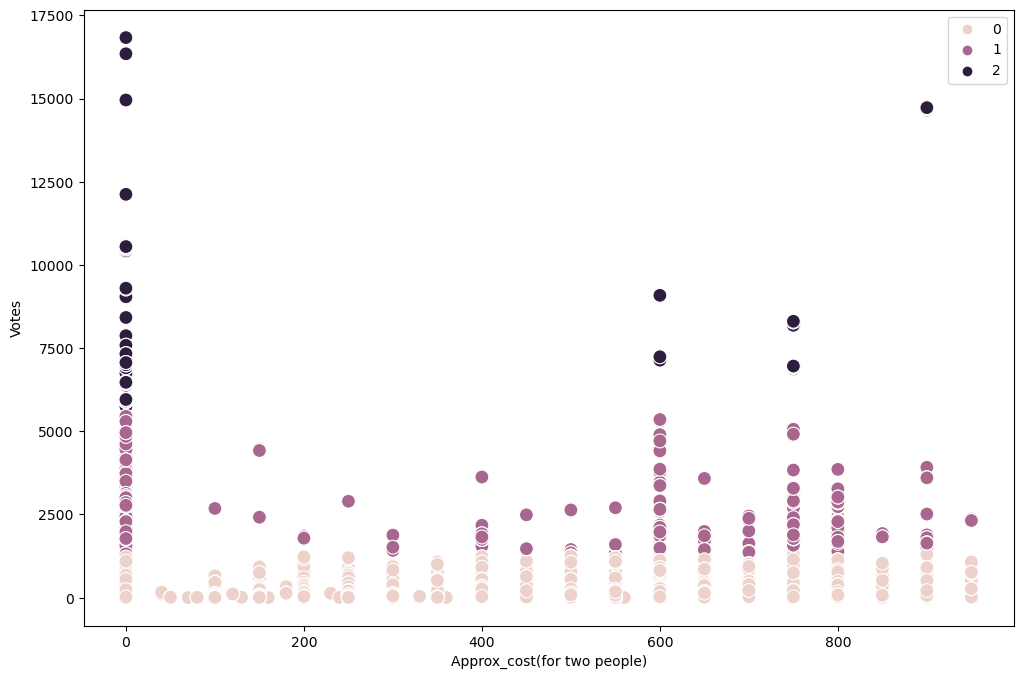

In [123]:
# Plot the clusters for the "approx_cost(for two people)" and "Votes" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['approx_cost(for two people)'], y=df['votes'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Approx_cost(for two people)') # Label x-axis.
plt.ylabel('Votes') # Label y-axis.
plt.show()

#### High-Cost, High-Votes: The cluster with higher costs (towards the right side of the x-axis) generally has a higher number of votes. This indicates that more expensive options tend to receive more votes.
#### Low-Cost, Low-Votes: Conversely, the cluster with lower costs (towards the left side of the x-axis) generally has a lower number of votes. This suggests that cheaper options tend to receive fewer votes.

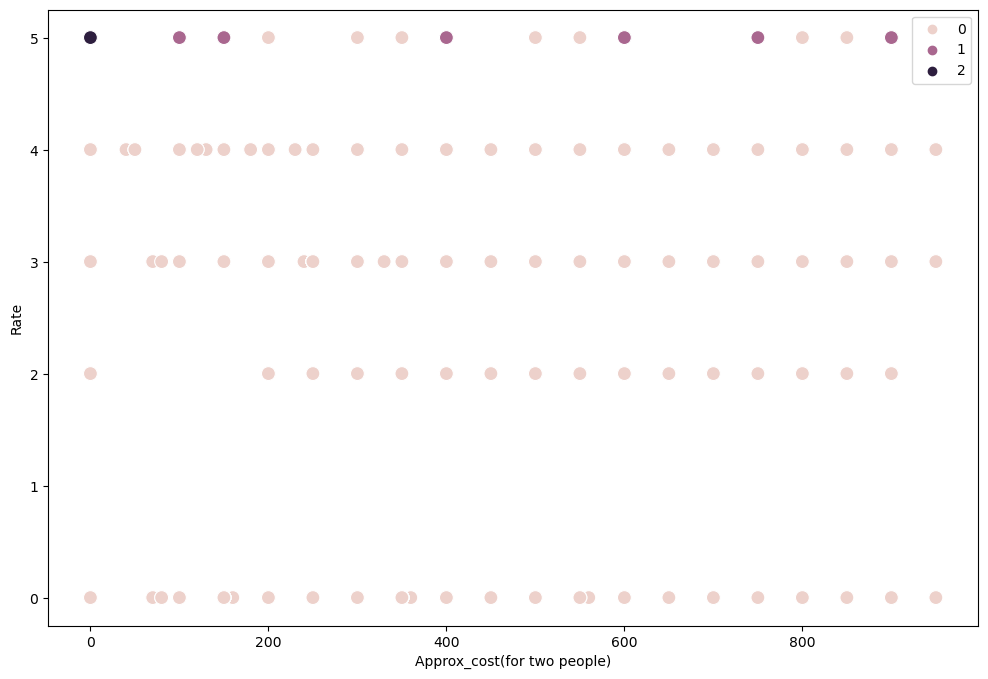

In [124]:
# Plot the clusters for the "Rate" and "approx_cost(for two people)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['approx_cost(for two people)'], y=df['rate'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Approx_cost(for two people)') # Label x-axis.
plt.ylabel('Rate') # Label y-axis.
plt.show()

In [125]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [126]:
df.groupby('cluster').agg({'approx_cost(for two people)':['mean', 'median'], 
                         'rate':['mean', 'median'], 
                         'votes':['mean', 'median']})

approx_cost(for two people)             rate               votes  \
                                   mean median      mean median         mean   
cluster                                                                        
dark purple                  234.236453    0.0  4.492611    4.0  8559.517241   
pink                         375.295123  400.0  3.499610    4.0   165.234204   
purple                       226.137737    0.0  4.117600    4.0  2459.898510   

                     
             median  
cluster              
dark purple  7544.0  
pink           55.0  
purple       2159.0

#### Approximate Cost for Two People:
#### Q: What is the distribution of approximate costs for two people across different categories?
#### A: The approximate cost for two people varies widely across different categories, with some categories having a higher concentration of lower costs and others showing a broader range.
#### Q: Are there any categories where the approximate cost for two people is significantly higher or lower than others?
#### A: Yes, there are categories where the approximate cost for two people is significantly higher or lower than others, indicating the presence of outliers.
#### Q: How does the approximate cost for two people vary across different categories?
#### A: The approximate cost for two people tends to be higher in certain categories compared to others, suggesting a variation in pricing across different categories.

#### Votes:
#### Q: What is the range of votes received across different categories?
#### A: The number of votes received varies across different categories, with some categories receiving a higher number of votes while others have fewer.
#### Q: Are there any categories that received an unusually high or low number of votes?
#### A: Yes, there are categories that received an unusually high or low number of votes, indicating the presence of outliers.
#### Q: Is there a trend in the number of votes received across different categories?
#### A: Yes, there is a noticeable trend in the number of votes received across different categories, with some categories consistently receiving more votes than others.